In [1]:
import pandas as pd 

data = pd.read_csv('/kaggle/input/cat-and-dog-sounds/test_cat_dog_sounds.csv')

In [2]:
data.head()

,filename,prediction,confidence
0,dog_barking_102.wav,Animal,0.417550
1,cat_43.wav,Animal,0.326914
2,dog_barking_29.wav,Chant,0.485365
3,cat_47.wav,Animal,0.693524
4,dog_barking_50.wav,Dog,0.593304


In [3]:
# Filter rows where the filename indicates 'dog' or 'cat' and the prediction matches the respective animal

cat_sounds = data[(data['filename'].str.contains('cat', case=False)) & (data['prediction'].str.contains('Cat', case=False))]
dog_sounds = data[(data['filename'].str.contains('dog', case=False)) & (data['prediction'].str.contains('Dog', case=False))]

cat_sounds, dog_sounds

(        filename prediction  confidence
 32   cat_136.wav        Cat    0.338845
 50    cat_67.wav        Cat    0.986962
 51    cat_68.wav        Cat    0.258646
 69   cat_119.wav        Cat    0.127967
 73   cat_116.wav        Cat    0.178814
 85     cat_6.wav        Cat    0.916191
 87     cat_4.wav        Cat    0.860027
 128   cat_58.wav        Cat    0.608428
 149  cat_134.wav        Cat    0.482385
 154   cat_37.wav        Cat    0.344242
 170   cat_75.wav        Cat    0.140669
 179   cat_57.wav        Cat    0.442447
 192   cat_15.wav        Cat    0.499535
 199  cat_110.wav        Cat    0.864829
 202  cat_146.wav        Cat    0.283079
 209  cat_121.wav        Cat    0.309115
 210  cat_112.wav        Cat    0.204221
 241   cat_16.wav        Cat    0.664854
 263   cat_18.wav        Cat    0.656098
 272   cat_50.wav        Cat    0.241393,
                 filename prediction  confidence
 4     dog_barking_50.wav        Dog    0.593304
 5     dog_barking_83.wav        Dog    

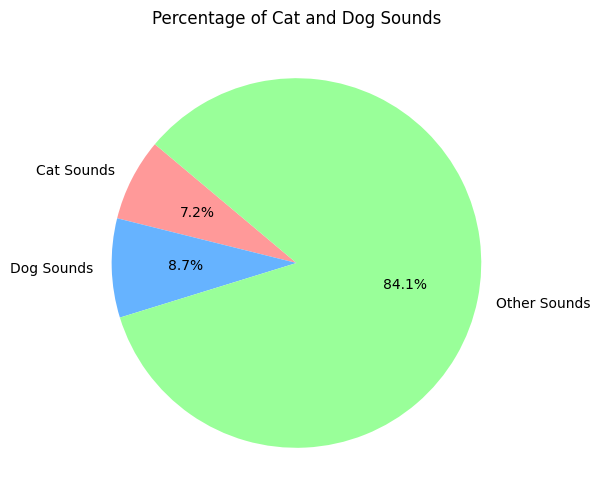

In [4]:
import matplotlib.pyplot as plt

# Calculate the percentage of cat and dog sounds
cat_percentage = (len(cat_sounds) / len(data)) * 100
dog_percentage = (len(dog_sounds) / len(data)) * 100

# Prepare data for the pie chart
labels = ['Cat Sounds', 'Dog Sounds', 'Other Sounds']
sizes = [cat_percentage, dog_percentage, 100 - (cat_percentage + dog_percentage)]
colors = ['#ff9999','#66b3ff','#99ff99']

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Cat and Dog Sounds')
plt.show()

In [5]:
# Append dog_sounds data to cat_sounds
dog_and_cat_sounds = pd.concat([cat_sounds, dog_sounds], ignore_index=True)
dog_and_cat_sounds

,filename,prediction,confidence
0,cat_136.wav,Cat,0.338845
1,cat_67.wav,Cat,0.986962
2,cat_68.wav,Cat,0.258646
3,cat_119.wav,Cat,0.127967
4,cat_116.wav,Cat,0.178814
5,cat_6.wav,Cat,0.916191
6,cat_4.wav,Cat,0.860027
7,cat_58.wav,Cat,0.608428
8,cat_134.wav,Cat,0.482385
9,cat_37.wav,Cat,0.344242


In [6]:
# Classify sounds based on confidence

dog_and_cat_sounds['type_of_sounds'] = dog_and_cat_sounds['confidence'].apply(lambda x: 'Loud' if x > 0.5 else 'Slow')
dog_and_cat_sounds

,filename,prediction,confidence,type_of_sounds
0,cat_136.wav,Cat,0.338845,Slow
1,cat_67.wav,Cat,0.986962,Loud
2,cat_68.wav,Cat,0.258646,Slow
3,cat_119.wav,Cat,0.127967,Slow
4,cat_116.wav,Cat,0.178814,Slow
5,cat_6.wav,Cat,0.916191,Loud
6,cat_4.wav,Cat,0.860027,Loud
7,cat_58.wav,Cat,0.608428,Loud
8,cat_134.wav,Cat,0.482385,Slow
9,cat_37.wav,Cat,0.344242,Slow


In [7]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
label_encoder = LabelEncoder()

# Encode 'type_of_sounds'
dog_and_cat_sounds['type_of_sounds_encoded'] = label_encoder.fit_transform(dog_and_cat_sounds['type_of_sounds'])

# Encode 'prediction'
dog_and_cat_sounds['prediction_encoded'] = label_encoder.fit_transform(dog_and_cat_sounds['prediction'])

In [8]:
# Setup X and y
X = dog_and_cat_sounds['prediction_encoded']
y = dog_and_cat_sounds['type_of_sounds_encoded']

In [9]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

X_train, X_test, y_train, y_test

(27    1
 31    1
 19    0
 17    0
 13    0
 41    1
 15    0
 9     0
 16    0
 30    1
 26    1
 0     0
 29    1
 42    1
 5     0
 11    0
 32    1
 1     0
 39    1
 21    1
 2     0
 33    1
 23    1
 35    1
 10    0
 22    1
 18    0
 43    1
 20    1
 7     0
 14    0
 28    1
 38    1
 Name: prediction_encoded, dtype: int64,
 37    1
 24    1
 25    1
 36    1
 34    1
 40    1
 4     0
 12    0
 8     0
 3     0
 6     0
 Name: prediction_encoded, dtype: int64,
 27    1
 31    0
 19    1
 17    0
 13    0
 41    0
 15    1
 9     1
 16    1
 30    0
 26    0
 0     1
 29    0
 42    0
 5     0
 11    1
 32    0
 1     0
 39    1
 21    1
 2     1
 33    0
 23    1
 35    0
 10    1
 22    1
 18    0
 43    1
 20    0
 7     0
 14    1
 28    0
 38    0
 Name: type_of_sounds_encoded, dtype: int64,
 37    1
 24    1
 25    0
 36    0
 34    0
 40    1
 4     1
 12    1
 8     1
 3     1
 6     0
 Name: type_of_sounds_encoded, dtype: int64)

In [10]:
from sklearn.metrics import roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
import numpy as np
from tensorflow.keras.utils import to_categorical

# Convert y_train and y_test to categorical for multi-class classification
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.values.reshape(-1, 1))
X_test_scaled = scaler.transform(X_test.values.reshape(-1, 1))

# Define the neural network model architecture
def build_model(input_dim, num_classes):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy')
    return model

# Build and train the model
model = build_model(input_dim=X_train_scaled.shape[1], num_classes=y_train_categorical.shape[1])

# Early stopping callback
early_stop = EarlyStopping(monitor='val_loss', patience=1, restore_best_weights=True)

# Train the model
model.fit(
    X_train_scaled, y_train_categorical,
    epochs=5, batch_size=32,
    validation_data=(X_test_scaled, y_test_categorical),
    callbacks=[early_stop], verbose=1
)

# Predict probabilities on the test set
y_pred_proba = model.predict(X_test_scaled)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test_categorical, y_pred_proba, multi_class='ovr')

roc_auc

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 184ms/step - loss: 0.7336 - val_loss: 0.6927
Epoch 2/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.6999 - val_loss: 0.6886
Epoch 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.6989 - val_loss: 0.6856
Epoch 4/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.6970 - val_loss: 0.6822
Epoch 5/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.6934 - val_loss: 0.6790
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


0.6607142857142857

In [11]:
import pickle

# Save the trained model to a .pkl file
with open('trained_cat_dog_model.pkl', 'wb') as file:
    pickle.dump(model, file)

- After trained model, 66% of the cat and dog sounds were correctly classified.